In [138]:
#installed all packages - numpy, pandaas, matplotlib, pandas_datareader
#installed distutils using pip install -upgrade setupTools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [139]:
#installed yfinance module from where data is being fetched
import yfinance as yf

#data of AAPL(apple) stock is being fetched from start to end specified
df = yf.download("AAPL", start="2010-01-01", end="2024-01-01")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367030,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [140]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [141]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367030,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [142]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


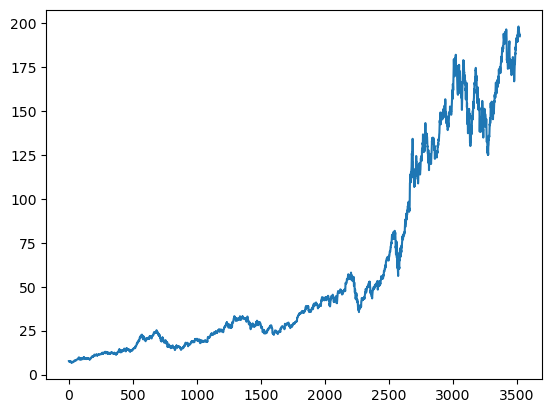

In [143]:
plt.plot(df.Close)

In [144]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3517,195.179993,195.410004,192.970001,193.600006,37122800
3518,193.610001,193.889999,192.830002,193.050003,28919300
3519,192.490005,193.500000,191.089996,193.149994,48087700
3520,194.139999,194.660004,193.169998,193.580002,34049900


In [145]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

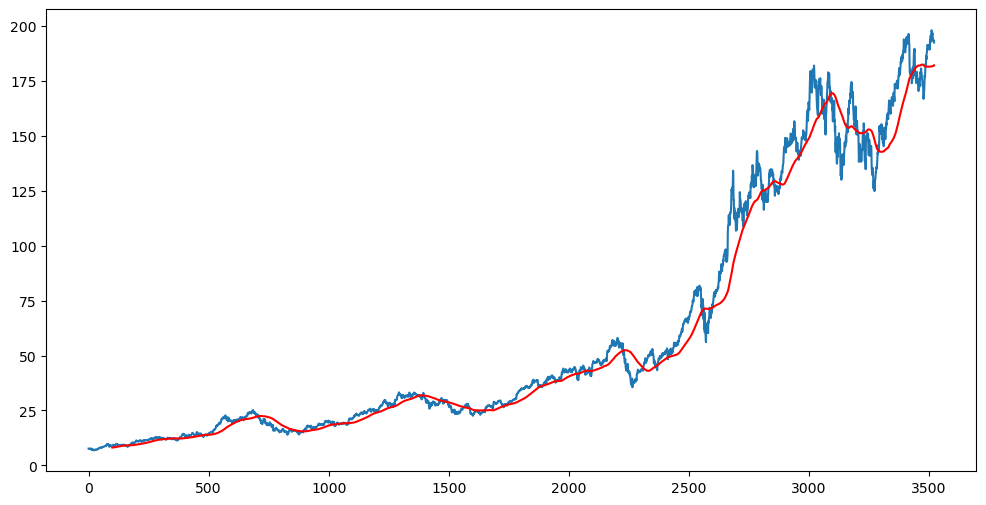

In [146]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [147]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

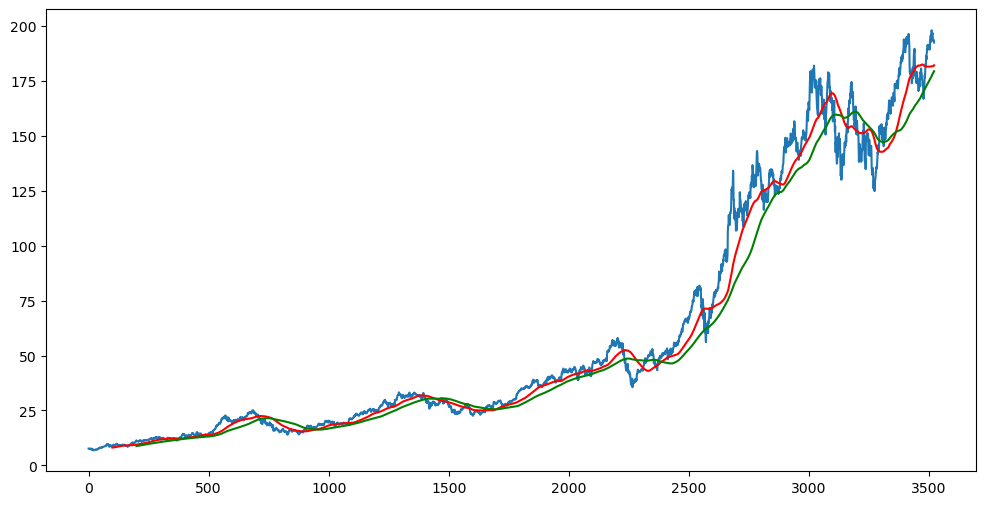

In [148]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [149]:
df.shape

(3522, 5)

In [150]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [151]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range =(0,1))

In [153]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [154]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [155]:
y_train

array([0.04194549, 0.04436096, 0.0470638 , ..., 0.99573703, 0.9911866 ,
       0.99554539])

In [156]:
y_train.shape

(2365,)

In [106]:
x_train.shape

(2365, 100, 1)

In [157]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [158]:
model=Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation ='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

C:\Users\Sumit\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [159]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 56s 360ms/step - loss: 0.0869
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 49s 464ms/step - loss: 0.0095
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 32s 342ms/step - loss: 0.0059
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 53s 504ms/step - loss: 0.0060
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 32s 369ms/step - loss: 0.0058
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - loss: 0.0052
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - loss: 0.0053
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - loss: 0.0052
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 366ms/step - loss: 0.0047
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 347ms/step - loss: 0.0046
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 345ms/step - loss: 0.0042
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 350ms/step - loss: 0.0042
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 25s 339ms/step - loss: 0.0039
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 382ms/step - loss: 0.0037
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 

In [160]:
model.save('keras_model.keras')

In [161]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [162]:
past_100_days = data_training.tail(100)

In [163]:
type(past_100_days)

pandas.core.frame.DataFrame

In [164]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [118]:
final_df

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000
...,...
1152,193.600006
1153,193.050003
1154,193.149994
1155,193.580002


In [165]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [166]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [167]:
input_data.shape

(1157, 1)

In [122]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [168]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])


In [79]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

array([[0.04141939],
       [0.        ],
       [0.01566579],
       [0.0258723 ],
       [0.03251837],
       [0.0617138 ],
       [0.10526943],
       [0.10954193],
       [0.10788041],
       [0.09969145],
       [0.11749349],
       [0.12497031],
       [0.09411346],
       [0.11144077],
       [0.10159037],
       [0.09411346],
       [0.16650841],
       [0.16567765],
       [0.17624019],
       [0.15202949],
       [0.1706622 ],
       [0.21398061],
       [0.20306204],
       [0.21504869],
       [0.27106579],
       [0.24946589],
       [0.23581773],
       [0.22359368],
       [0.18466657],
       [0.2036553 ],
       [0.15131735],
       [0.20258722],
       [0.21599815],
       [0.17956322],
       [0.17742706],
       [0.20223119],
       [0.17873255],
       [0.15772609],
       [0.16591506],
       [0.21576074],
       [0.27320195],
       [0.29931175],
       [0.34500355],
       [0.34785194],
       [0.33479704],
       [0.27581293],
       [0.21493007],
       [0.240

In [124]:
y_predicted = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step 


In [130]:
y_predicted.shape

(100, 1)

In [131]:
y_test

[0.10193171281546293,
 0.10855378673859561,
 0.1076654774813825,
 0.11286621716075762,
 0.11351228938298163,
 0.11835772014655277,
 0.12234712678017046,
 0.11304388394122733,
 0.11299543160520242,
 0.12187872133841615,
 0.13328165577060047,
 0.13599508516853537,
 0.13539748992747153,
 0.13557513206280591,
 0.13911230046343448,
 0.14025908789980784,
 0.14358627974757165,
 0.14319861176910198,
 0.1472526379475097,
 0.14429694686945044,
 0.1493361869771211,
 0.15150047347001705,
 0.15019221110707448,
 0.14518525612666355,
 0.1432793985226572,
 0.14290789775295265,
 0.15032140090638396,
 0.14696192393136043,
 0.15269566395214462,
 0.15174273515014147,
 0.14675194737849567,
 0.13914463488096485,
 0.14284327820816256,
 0.14904542367070112,
 0.157331118162851,
 0.15120975945386772,
 0.15372937950770305,
 0.15742802283490082,
 0.15854247585374381,
 0.1645023596361579,
 0.17210967213368877,
 0.17299803068117253,
 0.17191586278958926,
 0.17236810102257838,
 0.17143133942934036,
 0.17879639024674

In [129]:
y_predicted

array([[0.363261  ],
       [0.36328077],
       [0.36321136],
       [0.36317328],
       [0.36330956],
       [0.3633711 ],
       [0.36342672],
       [0.3635287 ],
       [0.36357847],
       [0.36362416],
       [0.36361146],
       [0.36361063],
       [0.36358175],
       [0.3636053 ],
       [0.36369863],
       [0.36368677],
       [0.36371928],
       [0.36370537],
       [0.36370128],
       [0.3636397 ],
       [0.36372623],
       [0.363725  ],
       [0.36368778],
       [0.36376202],
       [0.36378613],
       [0.36382043],
       [0.36381677],
       [0.36373073],
       [0.36375567],
       [0.36379635],
       [0.3637661 ],
       [0.36379778],
       [0.36383694],
       [0.36382228],
       [0.3637988 ],
       [0.3638464 ],
       [0.36378327],
       [0.3638791 ],
       [0.36391306],
       [0.3639095 ],
       [0.3638749 ],
       [0.36389   ],
       [0.36393067],
       [0.3639118 ],
       [0.36400104],
       [0.36390448],
       [0.36381248],
       [0.363

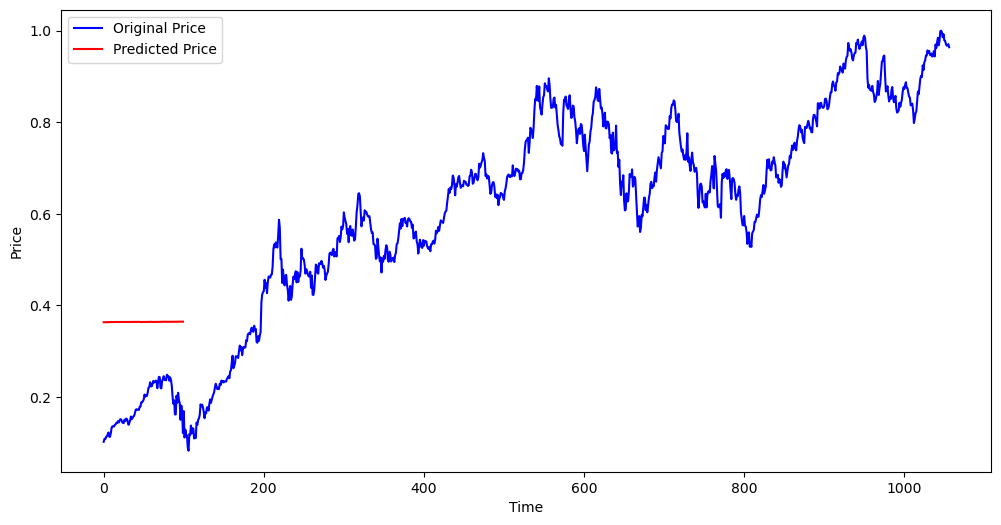

In [133]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()